In [1]:
%pylab inline
import pandas as pd

writer = pd.ExcelWriter('02 output.xlsx')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Promedios_y_graficas_por_horizonte(Horiz):
    
    Frame = pd.read_excel('02 nutrientes.xlsx') # Carga datos
    Frame = Frame[ Frame.Horizonte == Horiz ]   # Selecciona entre H1, H2 y H3
    
    aux1 = []                                   # Promedia sobre las distintas replicas en el mismo sitio
    for i in range(1,13):
        aux =  mean(Frame[Frame["Sitio"]==i])
        if( pd.notnull(aux["Muestra"])):        # Excepcion cuando no se tienen datos
            aux1.append(aux)
    df = pd.DataFrame(aux1)
    df = df.drop(["Muestra", "Punto"], axis=1)
    Frame = df
    
    print Frame                                 # Zona Norte y Zona Sur
    Frame_N = Frame[ Frame.Sitio <= 6 ]
    Frame_S = Frame[ Frame.Sitio >= 7 ]

    Columnas = list(Frame)
    Col2 = ["DA", "MgC_ha", "KgN_ha", "C_N", "KgS_ha", "KgP_ha", "CO"]
    
    aux = []                                    # Calcula promedios entre sitios por zonas
    for i in range(7):
        aux0 = [Columnas[1+i], "Total"  ,Frame.iloc[:,1+i].mean(), Frame.iloc[:,1+i].std()]
        aux.append(aux0)
        aux0 = [Columnas[1+i],"Norte", Frame_N.iloc[:,1+i].mean(), Frame_S.iloc[:,1+i].std()]
        aux.append(aux0)
        aux0 = [Columnas[1+i], "Sur" , Frame_S.iloc[:,1+i].mean(), Frame_S.iloc[:,1+i].std()]
        aux.append(aux0)

    frame_export = pd.DataFrame(aux)   
    frame_export.columns = ["Col", "Zone", "Mean", "STD"]
    frame_export.to_excel(writer, "nutrientes_totales_"+Horiz , index=False)
    print frame_export

    

    labelsize = 16                                                 # Graficar
    rcParams['xtick.labelsize'] = labelsize
    rcParams['ytick.labelsize'] = labelsize 
 
    for i in range(7):
        df = pd.DataFrame({ "Total":Frame.iloc[:,1+i],
                            "Norte":Frame_N.iloc[:,1+i],
                            "Sur"  :Frame_S.iloc[:,1+i],
                          })
        fig = figure(figsize=(7,5))
        df.boxplot( column=["Total", "Norte", "Sur"], fontsize=16)
        title(Horiz, fontsize = 22)
        xlabel(Columnas[1+i], fontsize=18)

        fig.savefig("02 nutrientes fig/"+Horiz+"_"+str(Col2[i])+".png")

    Sitio  DA (g/cm3)   MgC/ha  KgN/ha        C:N  KgS/ha      KgP/ha    CO
0       1       1.725  38.8430  4574.0   8.373512   0.850   17.566131  3.05
1       2       1.720  17.1740  1903.0   9.408333   0.160   10.085958  1.95
2       3       1.655  26.2245  3535.5   9.111406   0.355   22.005995  1.20
3       4       1.655  20.6190  3187.0   5.850962   0.460   13.447692  1.15
4       5       1.545  38.0895  4564.5   7.983333   0.440  157.935667  1.30
5       6       1.620  36.1600  3676.0  14.600840   0.950  294.873529  0.70
6       7       1.660  20.1500  3320.0   6.090226   0.600   12.899624  1.55
7       8       1.670  10.0710  2312.0   4.385417   0.260    9.371875  0.70
8       9       1.600   4.9320  1920.0   2.541667   0.120   11.777917  0.65
9      10       1.720  16.7350  2859.0   5.575758   0.230   21.828788  1.00
10     11       1.750  14.0700  2500.0   5.157895   0.185   17.203158  1.10
11     12       1.580  23.9680  3018.0   7.566092   0.205    3.486322  1.50
           C

/home/filipo/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py:2625: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  warnings.warn(msg, FutureWarning)


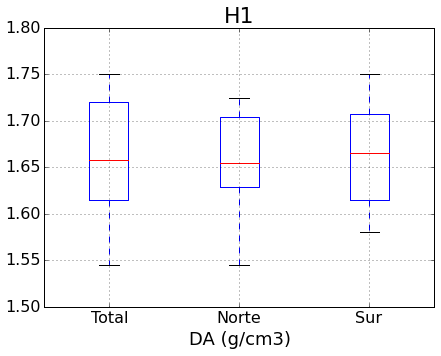

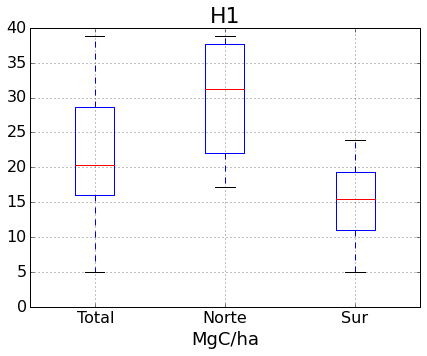

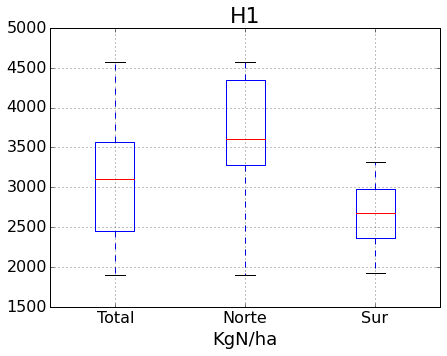

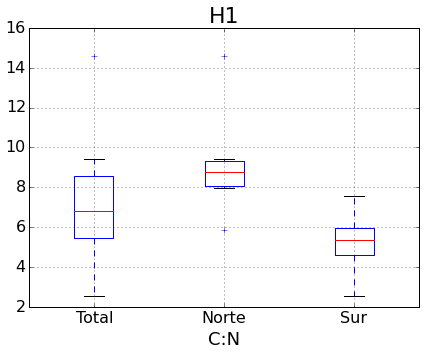

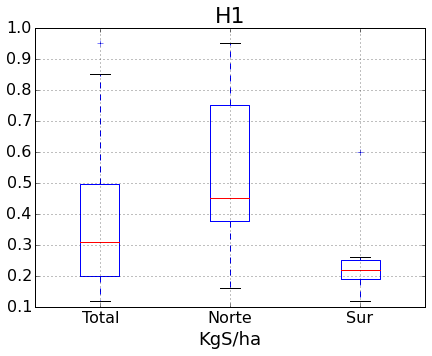

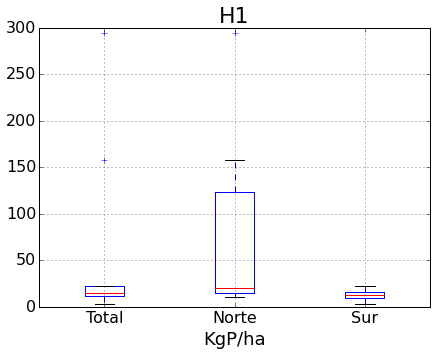

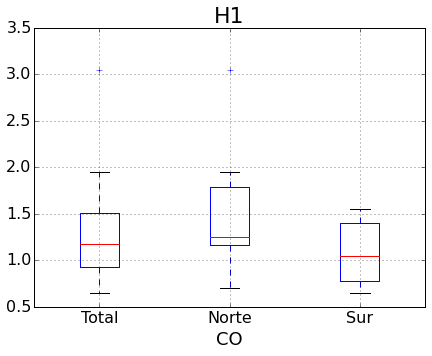

In [3]:
Promedios_y_graficas_por_horizonte("H1")

   Sitio  DA (g/cm3)   MgC/ha  KgN/ha        C:N  KgS/ha     KgP/ha    CO
0      1       1.695  26.1080  2919.5  11.027778   0.480  18.174167  2.90
1      2       1.830   6.2660  2920.0   2.633333   0.160   1.822667  0.60
2      3       1.785  26.7470  4203.5   5.801282   0.495   1.884968  0.70
3      4       1.575   6.5970  2596.5   2.065079   0.495   6.009590  1.85
4      6       1.550  14.2600  2635.0   4.600000   0.510  40.572000  0.80
5      7       1.680  30.7960  4212.0  10.142857   0.640  15.615714  1.00
6      8       1.845  27.8425  3571.5   6.444444   0.195   8.041667  0.75
7      9       1.745  11.8900  2074.5   5.111111   0.120  19.302222  0.60
8     10       1.760   8.6240  2112.0   4.083333   0.120  11.188333  2.10
9     11       1.710   3.9330  1539.0   2.555556   0.000   8.765556  0.60
           Col   Zone         Mean          STD
0   DA (g/cm3)  Total     1.717500     0.097958
1   DA (g/cm3)  Norte     1.687000     0.062510
2   DA (g/cm3)    Sur     1.748000     0.0

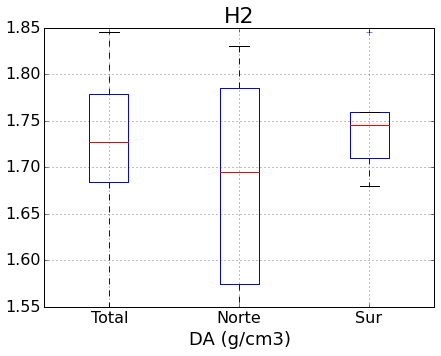

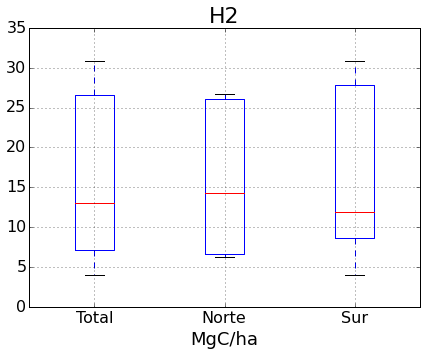

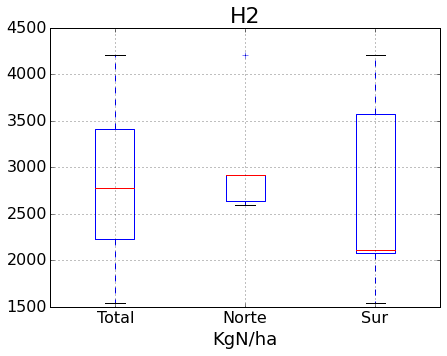

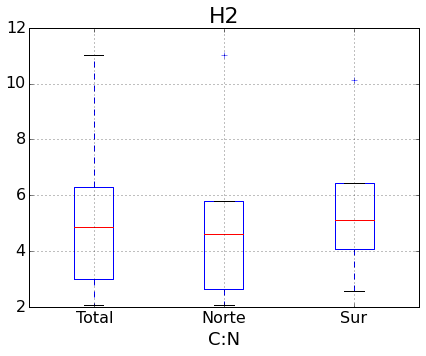

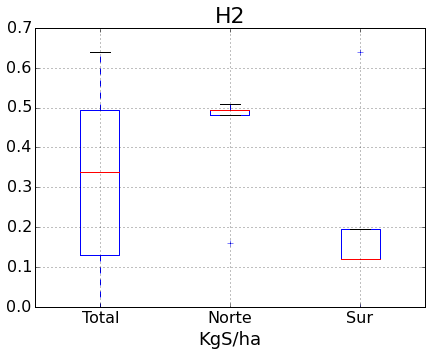

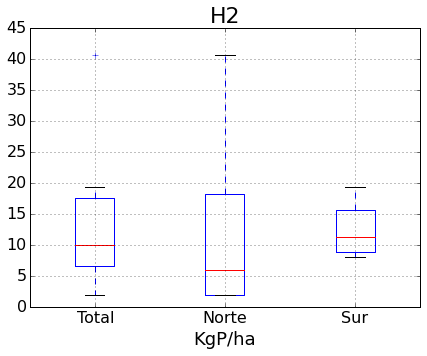

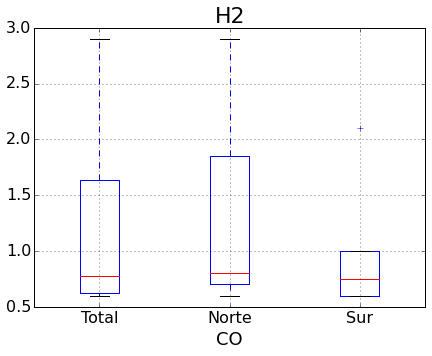

In [4]:
Promedios_y_graficas_por_horizonte("H2")

   Sitio  DA (g/cm3)   MgC/ha  KgN/ha       C:N  KgS/ha      KgP/ha   CO
0      1        1.66   4.8140    2324  2.071429    0.14    1.070929  0.5
1      2        1.89   6.8040    3591  1.894737    0.19    0.638526  1.6
2      4        1.81  12.0365    8145  2.293103    0.90    1.690017  0.9
3      6        1.80  34.2000    3600  9.500000    0.60  116.565000  0.6
4      7        1.80  10.4400    2520  4.142857    1.26    5.344286  0.9
5      9        1.70  12.7500    2040  6.250000    0.00   23.625000  0.9
           Col   Zone         Mean          STD
0   DA (g/cm3)  Total     1.776667     0.083106
1   DA (g/cm3)  Norte     1.790000     0.070711
2   DA (g/cm3)    Sur     1.750000     0.070711
3       MgC/ha  Total    13.507417    10.590945
4       MgC/ha  Norte    14.463625     1.633417
5       MgC/ha    Sur    11.595000     1.633417
6       KgN/ha  Total  3703.333333  2272.497099
7       KgN/ha  Norte  4415.000000   339.411255
8       KgN/ha    Sur  2280.000000   339.411255
9        

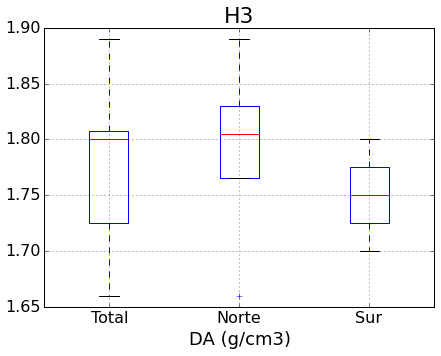

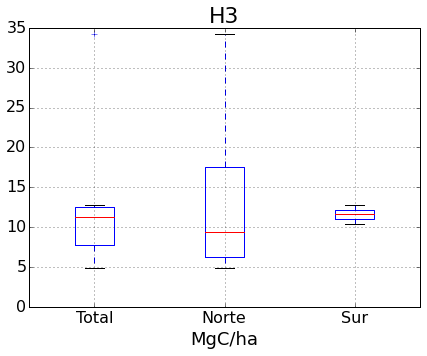

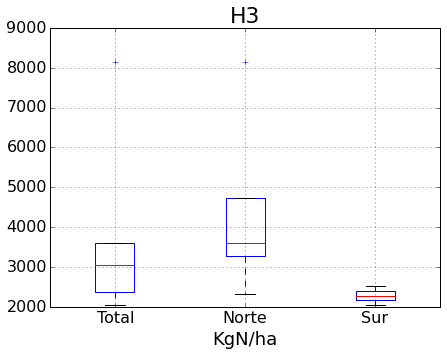

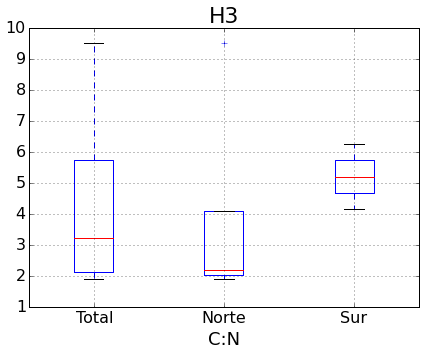

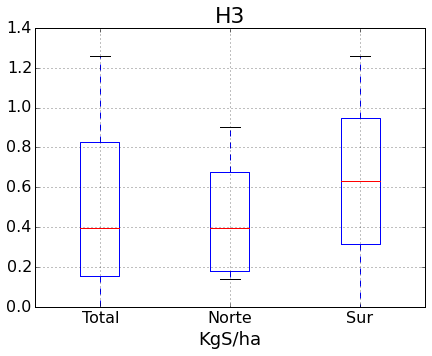

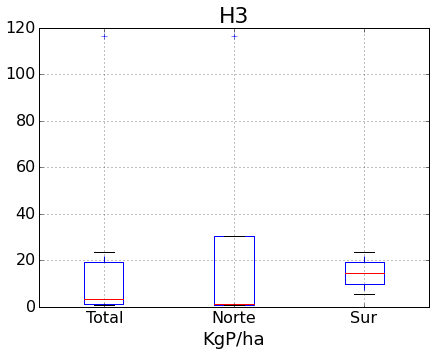

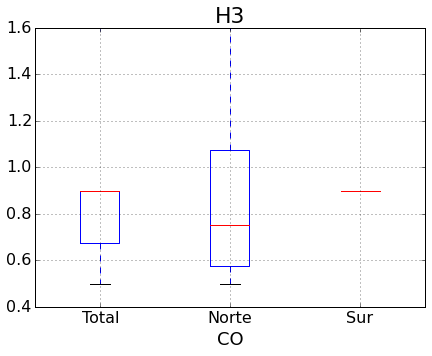

In [5]:
Promedios_y_graficas_por_horizonte("H3")
writer.save()